In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import silhouette_score

In [2]:
#Reading Stroke dataset
stroke1 = pd.read_csv("stroke1.csv")

# Data Analysis

In [3]:
# printing dataset's shape by displaying rows and columns 
print("Number of rows in brain stroke dataset :", len(stroke1))
print("Number of columns in brain stroke dataset :", len(stroke1.columns))

Number of rows in brain stroke dataset : 4981
Number of columns in brain stroke dataset : 11


In [4]:
# another way of priniting shape of dataset
stroke1.shape

(4981, 11)

In [5]:
# Displaying columns name
print ("Columns of Storke dataset:\n", stroke1.columns)

Columns of Storke dataset:
 Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [6]:
# displaying first 5 records 
stroke1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [7]:
# last 5 records
stroke1.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [8]:
#Checking Null values
stroke1.info()
#Dataset contains no null values, has few objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


# Data cleaning

In [9]:
# another way of checking Null values if any
# if there any null values(missing values) - we should replace the missing value or delete the row - impact on model performance
stroke1.isnull().values.any()

False

In [10]:
#summary statistics of numarical columns in the dataset
stroke1.describe()
#count - count of not null values in the column, dataset has totaly 4981 rows so the count below shows the columns has 4981 not null values -all the numarical column does not have any null values. 

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


# Outlier detection

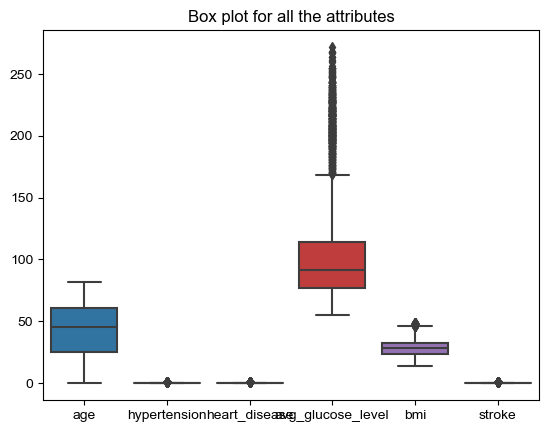

In [11]:
plt.title("Box plot for all the attributes")
sns.set_style("whitegrid")

sns.boxplot(data= stroke1)
#stroke1.boxplot()
plt.show()

<Axes: xlabel='avg_glucose_level'>

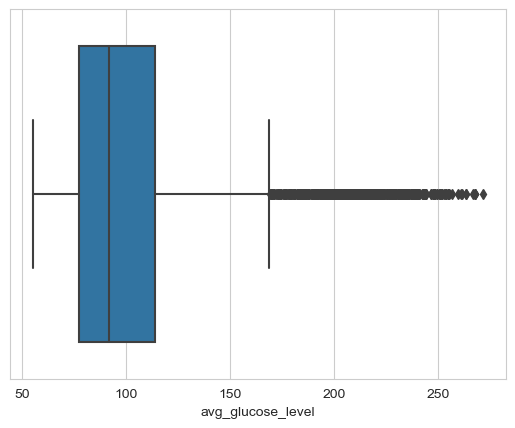

In [12]:
sns.boxplot(x=stroke1['avg_glucose_level'])
#avg glucose level has outliers but high glucose level leads to stroke- no need to remove the outliers

# Data visualisation

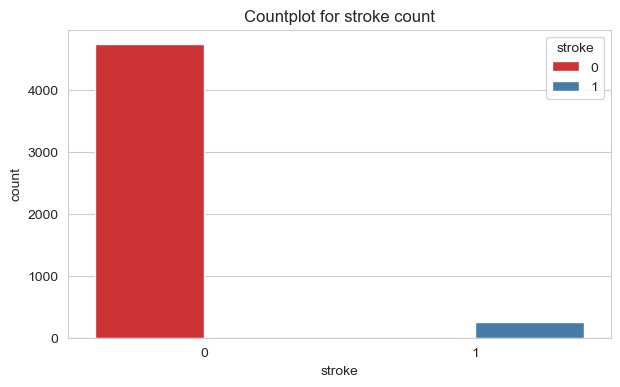

 Total count of people having stroke(1) or no stroke(0):


0    4733
1     248
Name: stroke, dtype: int64

In [13]:
#plotting important columns and thier value counts for analysis

#count of people had stroke(1) in the data set
sns.set_style("whitegrid")
plt.figure(figsize=(7,4))
plt.title("Countplot for stroke count")
sns.countplot(x='stroke',data=stroke1, hue='stroke', palette='Set1')
plt.show()
#sns.despine()

print (" Total count of people having stroke(1) or no stroke(0):")
stroke1['stroke'].value_counts()
#248 people had a stroke in this dataset

In [14]:
print ("People had a stroke & No stroke in percentage:")
yes=len(stroke1[stroke1.stroke==1])
no=len(stroke1[stroke1.stroke==0])
full=len(stroke1)
print ("People had stroke - {:.2f}%".format((yes/full)*100))
print ("People didn't had stroke - {:.2f}%".format((no/full)*100))

People had a stroke & No stroke in percentage:
People had stroke - 4.98%
People didn't had stroke - 95.02%


In [15]:
#categories/ labels present in the column
stroke1['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [16]:
print("Total Male & Female count -")
stroke1['gender'].value_counts()

Total Male & Female count -


Female    2907
Male      2074
Name: gender, dtype: int64

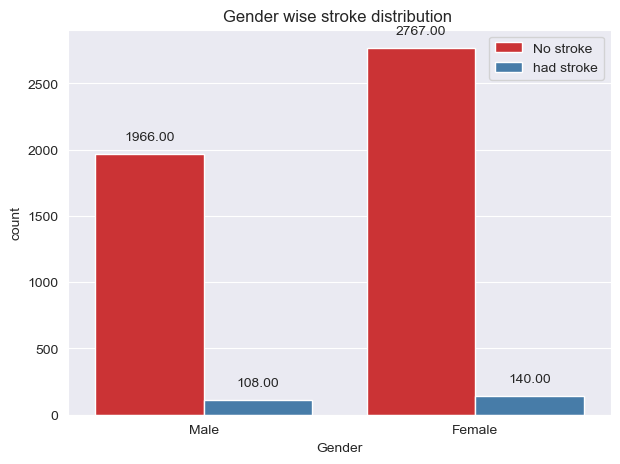

In [17]:
#Genderwise distribution of stroke counts
sns.set_style("darkgrid")
plt.figure(figsize=(7,5))
plt.title("Gender wise stroke distribution ")
plots= sns.countplot(x='gender',data=stroke1, hue='stroke',palette='Set1')
plt.xlabel('Gender')
plt.legend(['No stroke','had stroke'] )

for bar in plots.patches:
    plots. annotate(format(bar.get_height(),'.2f'), (bar.get_x()+bar.get_width()/2, bar.get_height()),ha='center', va='bottom', size=10, xytext=(0,8), textcoords='offset points')

#for removing borders sns.despine()
plt.show()


#stroke1[['gender','stroke']].apply(pd.value_counts)



In [18]:
stroke1['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

Pie chart for attribute smoking_status


C:\Users\Shiva\AppData\Local\Temp\ipykernel_8844\2125816205.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stroke1.groupby(['smoking_status']).sum().plot(kind ='pie', y='stroke',autopct='%1.0f%%')


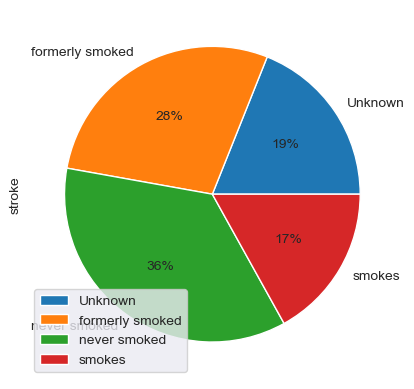

Total smokers count -


never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

In [19]:
print("Pie chart for attribute smoking_status")
stroke1.groupby(['smoking_status']).sum().plot(kind ='pie', y='stroke',autopct='%1.0f%%')
plt.show()
print("Total smokers count -")
stroke1['smoking_status'].value_counts()



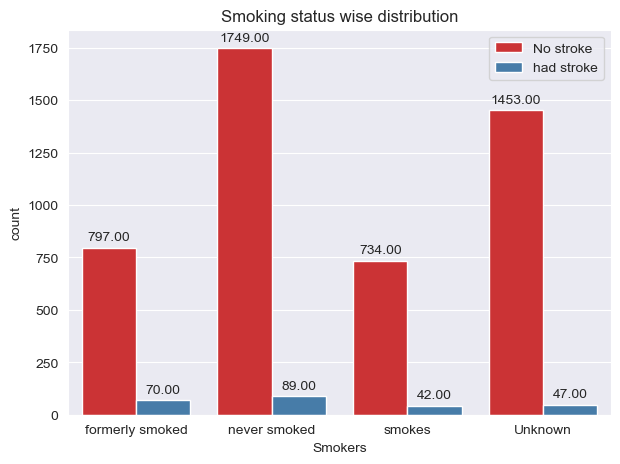

In [20]:
# Smoking status distribution
sns.set_style("darkgrid")
plt.figure(figsize=(7,5))
plt.title("Smoking status wise distribution")
plots=sns.countplot(x='smoking_status',hue='stroke', data=stroke1,palette='Set1')
plt.xlabel('Smokers')
plt.legend(['No stroke','had stroke'] )
for bar in plots.patches:
    plots. annotate(format(bar.get_height(),'.2f'), (bar.get_x()+bar.get_width()/2, bar.get_height()),
                    ha='center', va='bottom', size=10, xytext=(0,3), textcoords='offset points')

plt.show()

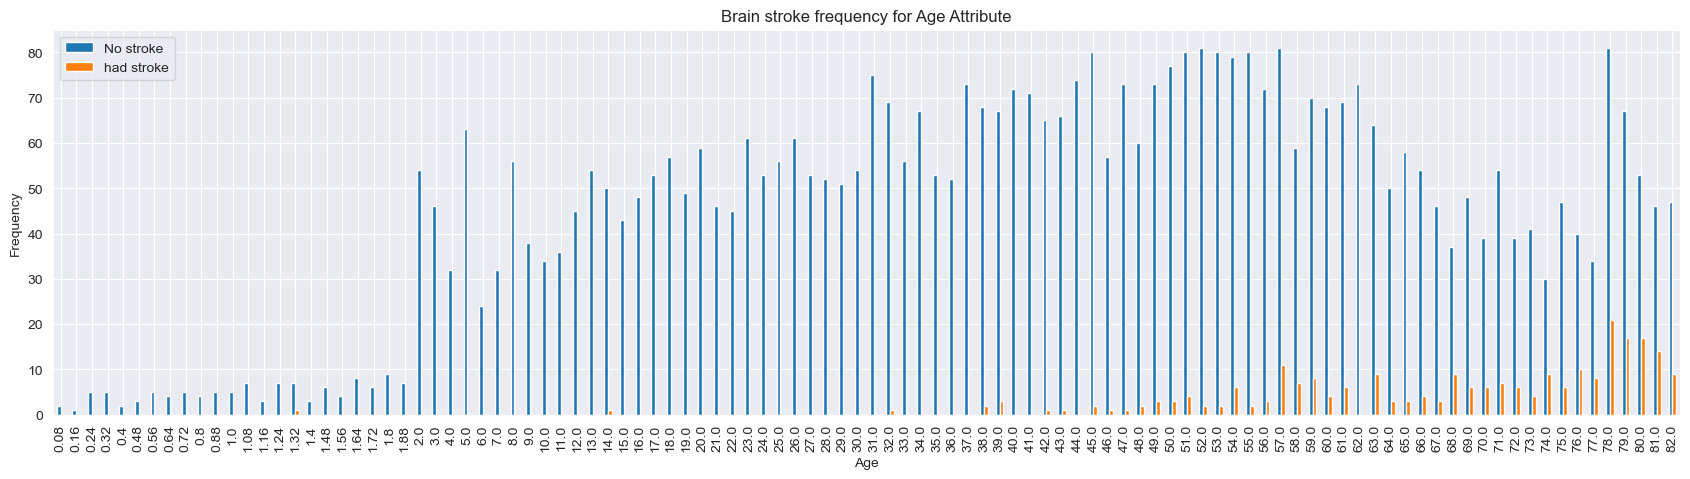

In [21]:
pd.crosstab(stroke1.age,stroke1.stroke).plot(kind='bar',figsize=(21,5))
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(['No stroke','had stroke'] )
plt.title('Brain stroke frequency for Age Attribute')
plt.show()


In [22]:
stroke1['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children'], dtype=object)

In [23]:
print("Count of work type catogery -")
stroke1['work_type'].value_counts()

Count of work type catogery -


Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

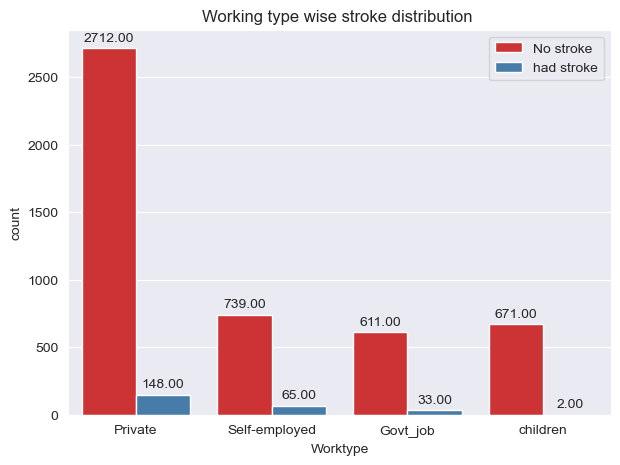

In [24]:
sns.set_style("darkgrid")
plt.figure(figsize=(7,5))
plt.title("Working type wise stroke distribution ")
plots=sns.countplot(x='work_type',hue='stroke', data=stroke1,palette='Set1')
plt.xlabel('Worktype')
plt.legend(['No stroke','had stroke'] )
for bar in plots.patches:
    plots. annotate(format(bar.get_height(),'.2f'), (bar.get_x()+bar.get_width()/2, bar.get_height()),
                    ha='center', va='bottom', size=10, xytext=(0,3), textcoords='offset points')
plt.show()





In [25]:
print("Count of people had hypertension -")
stroke1['hypertension'].value_counts()

Count of people had hypertension -


0    4502
1     479
Name: hypertension, dtype: int64

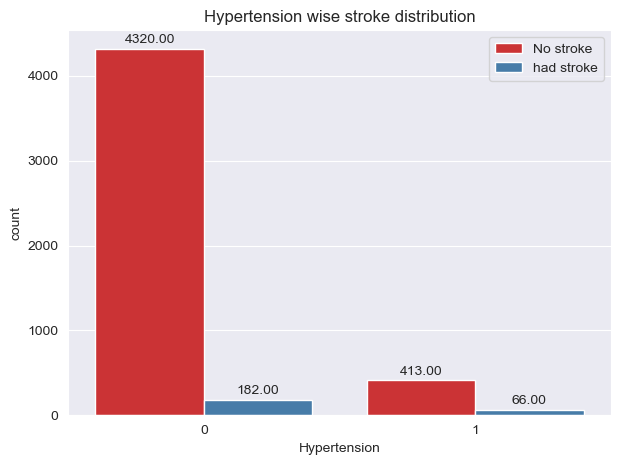

In [26]:
sns.set_style("darkgrid")
plt.figure(figsize=(7,5))
plt.title("Hypertension wise stroke distribution")
plots = sns.countplot(x='hypertension',hue='stroke', data=stroke1,palette='Set1')
plt.xlabel('Hypertension')
plt.legend(['No stroke','had stroke'] )
for bar in plots.patches:
    plots. annotate(format(bar.get_height(),'.2f'), (bar.get_x()+bar.get_width()/2, bar.get_height()),
                    ha='center', va='bottom', size=10, xytext=(0,2), textcoords='offset points')
plt.show()


In [27]:
print("Count of people have heart disease -")
stroke1['heart_disease'].value_counts()

Count of people have heart disease -


0    4706
1     275
Name: heart_disease, dtype: int64

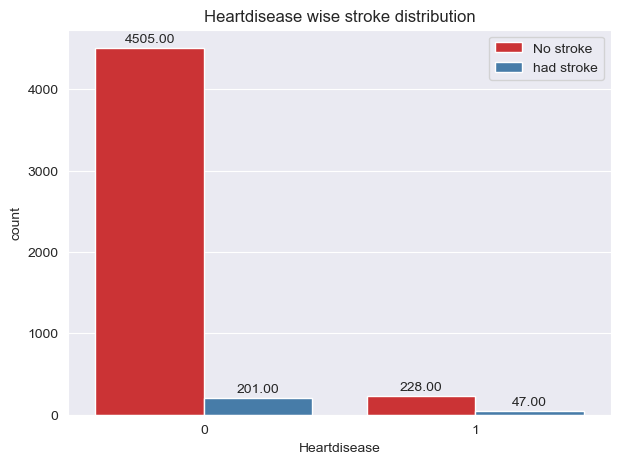

In [28]:
sns.set_style("darkgrid")
plt.figure(figsize=(7,5))
plt.title("Heartdisease wise stroke distribution")
plots = sns.countplot(x='heart_disease',hue='stroke', data=stroke1,palette='Set1')
plt.xlabel('Heartdisease')
plt.legend(['No stroke','had stroke'] )
for bar in plots.patches:
    plots. annotate(format(bar.get_height(),'.2f'), (bar.get_x()+bar.get_width()/2, bar.get_height()),
                    ha='center', va='bottom', size=10, xytext=(0,2), textcoords='offset points')
plt.show()



# Pre-processing

In [29]:
stroke1['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [30]:
stroke1['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [31]:
stroke1.drop(['Residence_type','ever_married' ],axis=1, inplace = True)

In [32]:
print ("Columns of Storke dataset:\n", stroke1.columns)
print("Number of columns in brain stroke dataset :", len(stroke1.columns))

Columns of Storke dataset:
 Index(['gender', 'age', 'hypertension', 'heart_disease', 'work_type',
       'avg_glucose_level', 'bmi', 'smoking_status', 'stroke'],
      dtype='object')
Number of columns in brain stroke dataset : 9


In [33]:
#converting catogories to numerical (object-int)
Labelencoder=LabelEncoder()
stroke1["smoking_status"]= Labelencoder.fit_transform(stroke1['smoking_status'])
stroke1['smoking_status'].value_counts()

2    1838
0    1500
1     867
3     776
Name: smoking_status, dtype: int64

In [34]:
Labelencoder1=LabelEncoder()
stroke1["gender"]= Labelencoder1.fit_transform(stroke1['gender'])
stroke1['gender'].value_counts()

0    2907
1    2074
Name: gender, dtype: int64

In [35]:
Labelencoder3=LabelEncoder()
stroke1["work_type"]= Labelencoder3.fit_transform(stroke1['work_type'])
stroke1['work_type'].value_counts()

1    2860
2     804
3     673
0     644
Name: work_type, dtype: int64

In [36]:
stroke1.head()

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,105.92,32.5,2,1
2,0,49.0,0,0,1,171.23,34.4,3,1
3,0,79.0,1,0,2,174.12,24.0,2,1
4,1,81.0,0,0,1,186.21,29.0,1,1


In [37]:
stroke1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int32  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   work_type          4981 non-null   int32  
 5   avg_glucose_level  4981 non-null   float64
 6   bmi                4981 non-null   float64
 7   smoking_status     4981 non-null   int32  
 8   stroke             4981 non-null   int64  
dtypes: float64(3), int32(3), int64(3)
memory usage: 292.0 KB
